# Telco survival  Analysis and Churn

Dataset Info: Sample Data Set containing Telco customer data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

# 1. Data Reading
The first step of the analysis consists of reading and storing the data in a Pandas data frame using the pandas.read_csv function.

In [2]:
# import telecom dataset into a pandas data frame
telco_data = pd.read_csv('Telco-Customer-Churn.csv')

# visualize column names
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 2. Exploratory Data Analysis and Data Cleaning

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

 Look at the top 5 records of data

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
telco_data.shape

(7043, 21)

In [5]:
# Checking the data types of all the columns
print(telco_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# summary of the data frame
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [7]:
# Check the descriptive statistics of numeric variables
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [8]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced, ratio = 73:27

So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

1. Create a copy of base data for manupulation & processing

In [4]:
df = telco_data.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [6]:
df.loc[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [7]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

#df.fillna(0)

In [8]:
# checking for row and cols after removing na values
df.shape

(7032, 21)

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

5. Remove columns not required for processing

In [10]:
#drop column customerID and tenure
df.drop(columns= ['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data exploration and Visualisation
Doing more visualization to better understand the patterns in the data and potentially form some hypothesis. First looking at the distribution of individual variables and then slice and dice the data for to check if interesting trends are present.

1 .Demographics to understand the gender, age range, patner and dependent status of the customers

Gender Distribution - About half of the customers in our data set are male while the other half are female

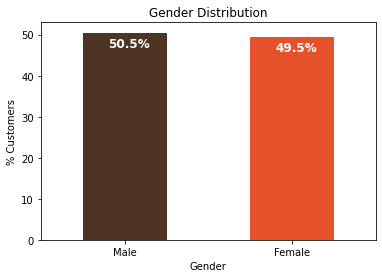

In [14]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                 stacked = True,
                                                 rot = 0,color = colors)

ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

% Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, '% of Senior Citizens')

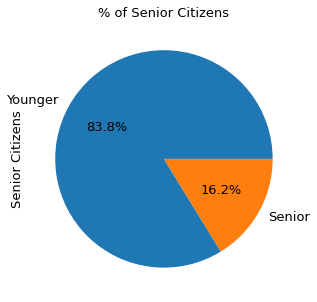

In [19]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'],
          figsize =(5,5), fontsize = 13 )                                                                           

ax.set_ylabel('Senior Citizens',fontsize = 13)
ax.set_title('% of Senior Citizens', fontsize = 13)

Partner and dependent status - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

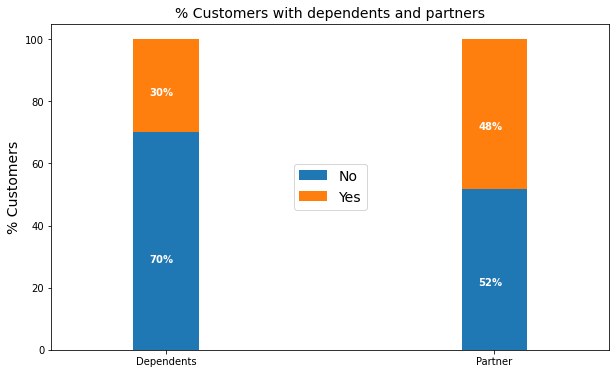

In [20]:
df = pd.melt(telco_data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(telco_data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),
                                      rot = 0,width = 0.2)

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

It would be interesting is to look at the % of customers with both partners and dependents.

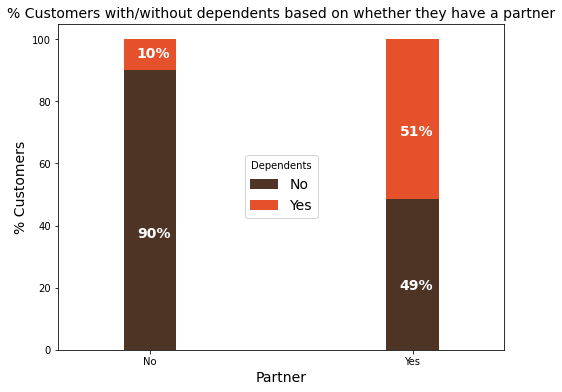

In [16]:
partner_dependents = telco_data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)

ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

 Customer Account Information: 

C:\Users\arunk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by tenure')

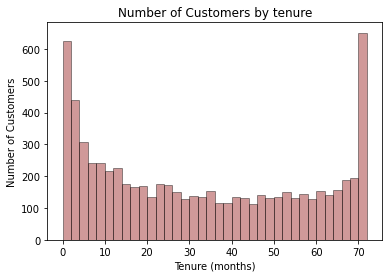

In [17]:
ax = sns.distplot(telco_data['tenure'], hist=True, kde=False, 
             bins=int(180/5),  color = 'darkred',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':25 })
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

Checking the customers by tenure of contract

Text(0.5, 1.0, 'Number of Customers by Contract Type')

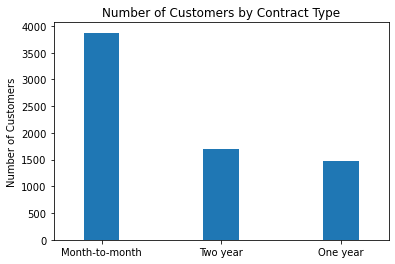

In [23]:
ax = telco_data['Contract'].value_counts().plot(kind = 'bar',rot = 0,
                                                width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

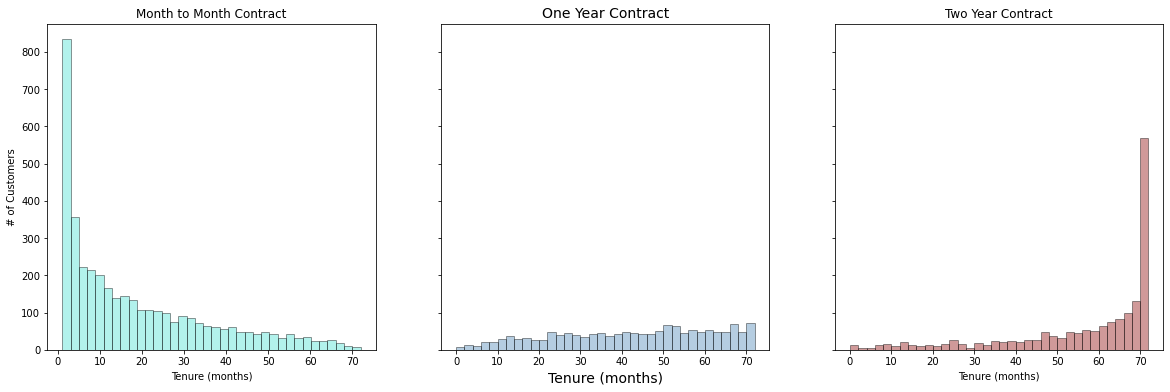

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telco_data[telco_data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False, bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telco_data[telco_data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telco_data[telco_data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,bins=int(180/5), color = 'darkred',
                   hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Let us now look at the distribution of various services used by customers

In [25]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

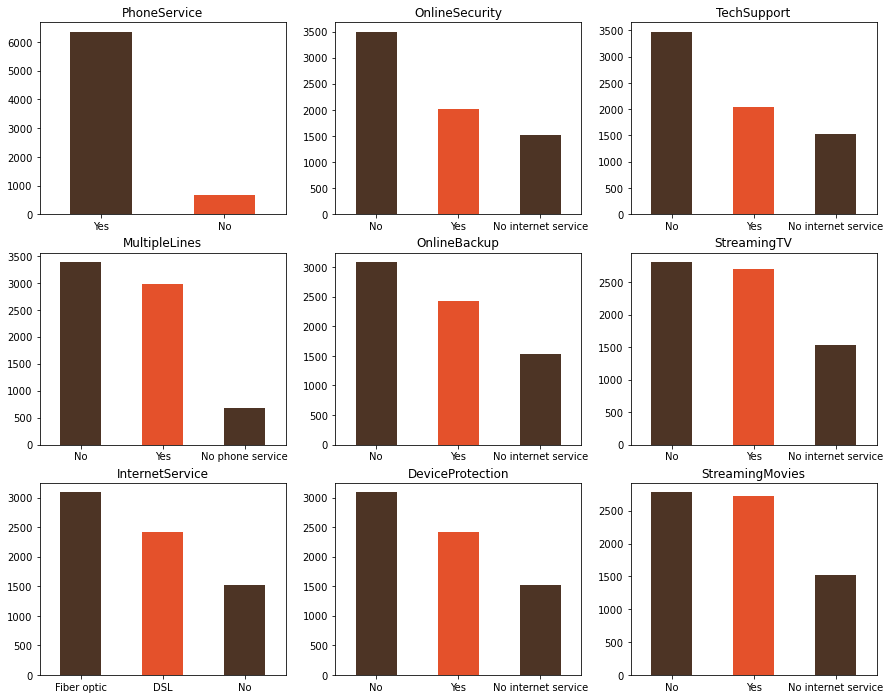

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telco_data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color = colors)
        
    elif i >=3 and i < 6:
        ax = telco_data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color = colors)
        
    elif i < 9:
        ax = telco_data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = colors)
    ax.set_title(item)

 Above plot displays a clear visbility of the different services provided by the Telecom company and availabled by the customers.

Now let's take a quick look at the relation between monthly and total charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

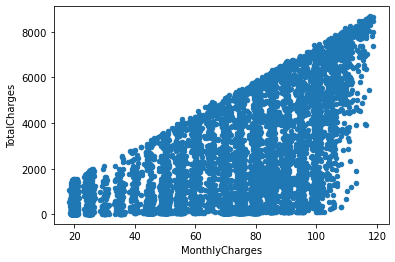

In [40]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                     y='TotalCharges')

We will observe that the total charges increases as the monthly bill for a customer increases.

Datamining to check prediction variable and it's interaction with other variables

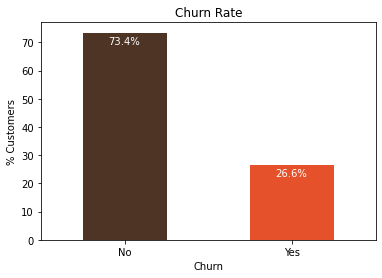

In [41]:
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                            stacked = True,rot = 0,color = colors )
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn or 73.5 % stay in the service  . Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling.

# Churn by Contract Type: 




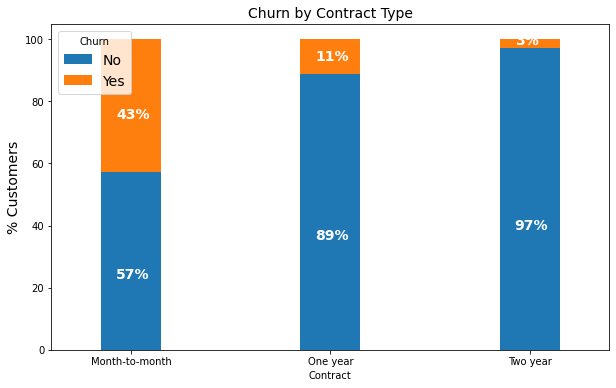

In [42]:
contract_churn = telco_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

The customers who have a month to month contract have a very high churn rate. This gives some valuable input to sales/marketing department.

# Churn by Seniority

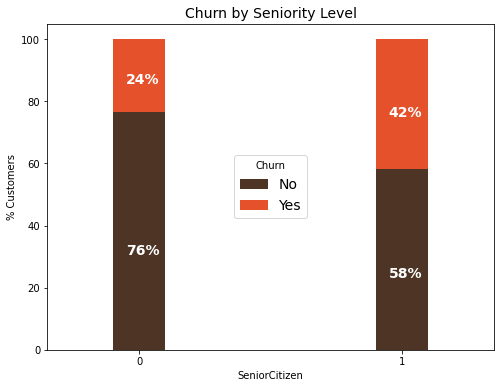

In [43]:
seniority_churn = telco_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. 

# Churn by Monthly Charges:

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

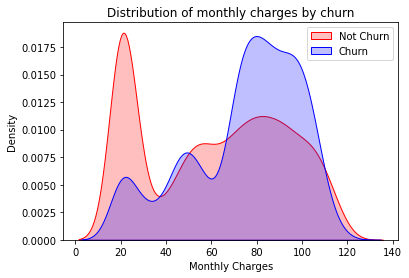

In [44]:
ax = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

From above plot, we can understand that Higher % of customers churn when the monthly charges are high.

# Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

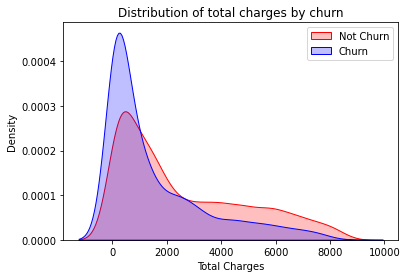

In [45]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method  Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

It seems that there is higer churn when the total charges are lower.

# Findings

1) Month-to-month contracts are the most dominant contract for the company.

2) Customers in month-to-month contracts have a high churn rate. Almost four times higher than one-year contract and fourteen times higher than two-year contract.

3) Customers who sign longer contracts are less likely to leave the company.

4) Customers with higher monthly charges are more likely to churn than those with lower charges in all contract types

5) Customers are less likely to churn if they have been with the company for a long period of time.

6) It is interesting to note that the probability of churning decreases after reaching a certain level of total charges.

# 4   FEATURE ENGINEERING

Feature Encoding Before Modelling

In [20]:
## USE ORDINALECODER TO ENCODE ALL CATEGORICAL ATTRIBUTES. 
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

telco_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
         'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
         'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]= oe.fit_transform(telco_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])
telco_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]= telco_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']].astype(int)

print('Features after encoding')
telco_data.head()

Features after encoding


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes


In [18]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  Feature Selection

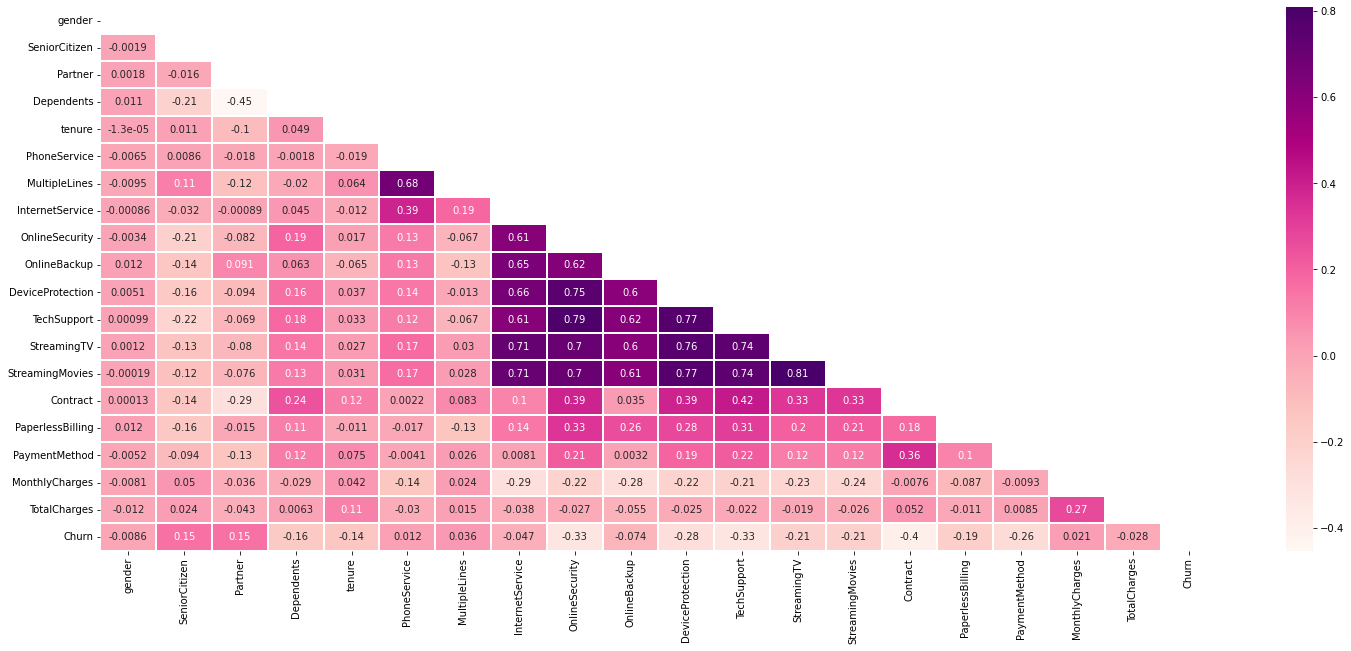

In [20]:
## PLOT HEATMAP FOR ALL FEATURES
plt.figure(figsize=(25, 10))

corr = telco_data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdPu',
                 annot = True, linewidths = .2)

# FIND THE FEATURE IMPORTANCE

In [51]:
### PRINT OUT THE IMPORTANCE FIGURES
impFeature

TotalCharges                               0.164747
MonthlyCharges                             0.140598
tenure                                     0.137874
Contract_Month-to-month                    0.058056
OnlineSecurity_No                          0.034989
PaymentMethod_Electronic check             0.029904
InternetService_Fiber optic                0.024270
TechSupport_No                             0.023459
SeniorCitizen                              0.020108
gender_Male                                0.017720
gender_Female                              0.017417
OnlineBackup_No                            0.016125
PaperlessBilling_No                        0.015499
PaperlessBilling_Yes                       0.015161
DeviceProtection_No                        0.014915
Partner_No                                 0.014384
Contract_Two year                          0.014285
Partner_Yes                                0.013935
MultipleLines_No                           0.013282
MultipleLine

In [21]:
## FIND THE FEATURE IMPORTANCE 
from sklearn.ensemble import RandomForestClassifier 
import plotly.graph_objects as go

X = telco_data.drop(columns=['Churn'])
y = telco_data['Churn']
clf = RandomForestClassifier(n_estimators = 100,random_state = 0).fit(X,y)

impFeature = pd.Series(data = clf.feature_importances_, index = X.columns).sort_values(ascending = False)

fig = go.Figure(go.Bar(
            x = impFeature.values,
            y = impFeature.index,
            orientation = 'h'))
fig.update_layout({"title": {"text": "Feature Importance using Random Forest Classifier",
                             "font": {"size": 20}}})
fig.show()

ValueError: could not convert string to float: ''

# Correlation Matrix

Correlations between customer data features and customer churn
Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.

In [23]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [19]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df = pd.get_dummies(df)

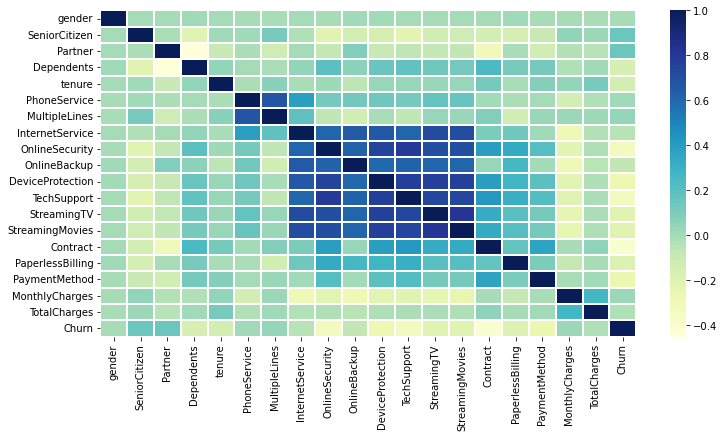

In [11]:
plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, 
                 yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


Text(0.5, 1.0, 'Correlation between Quantitative variables')

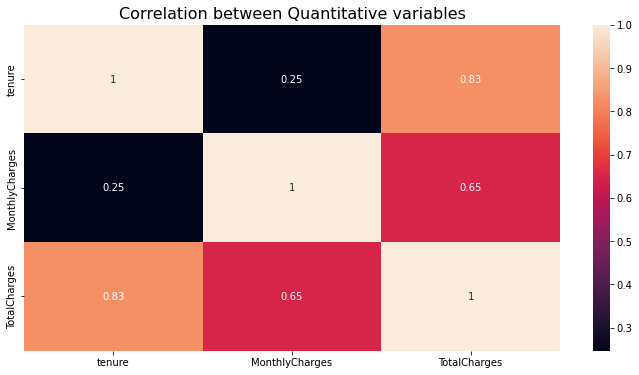

In [19]:
# correlation between quantitative variables
plt.figure(figsize=(12, 6))
sns.heatmap(data=df[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True)

plt.title("Correlation between Quantitative variables",fontsize=16)


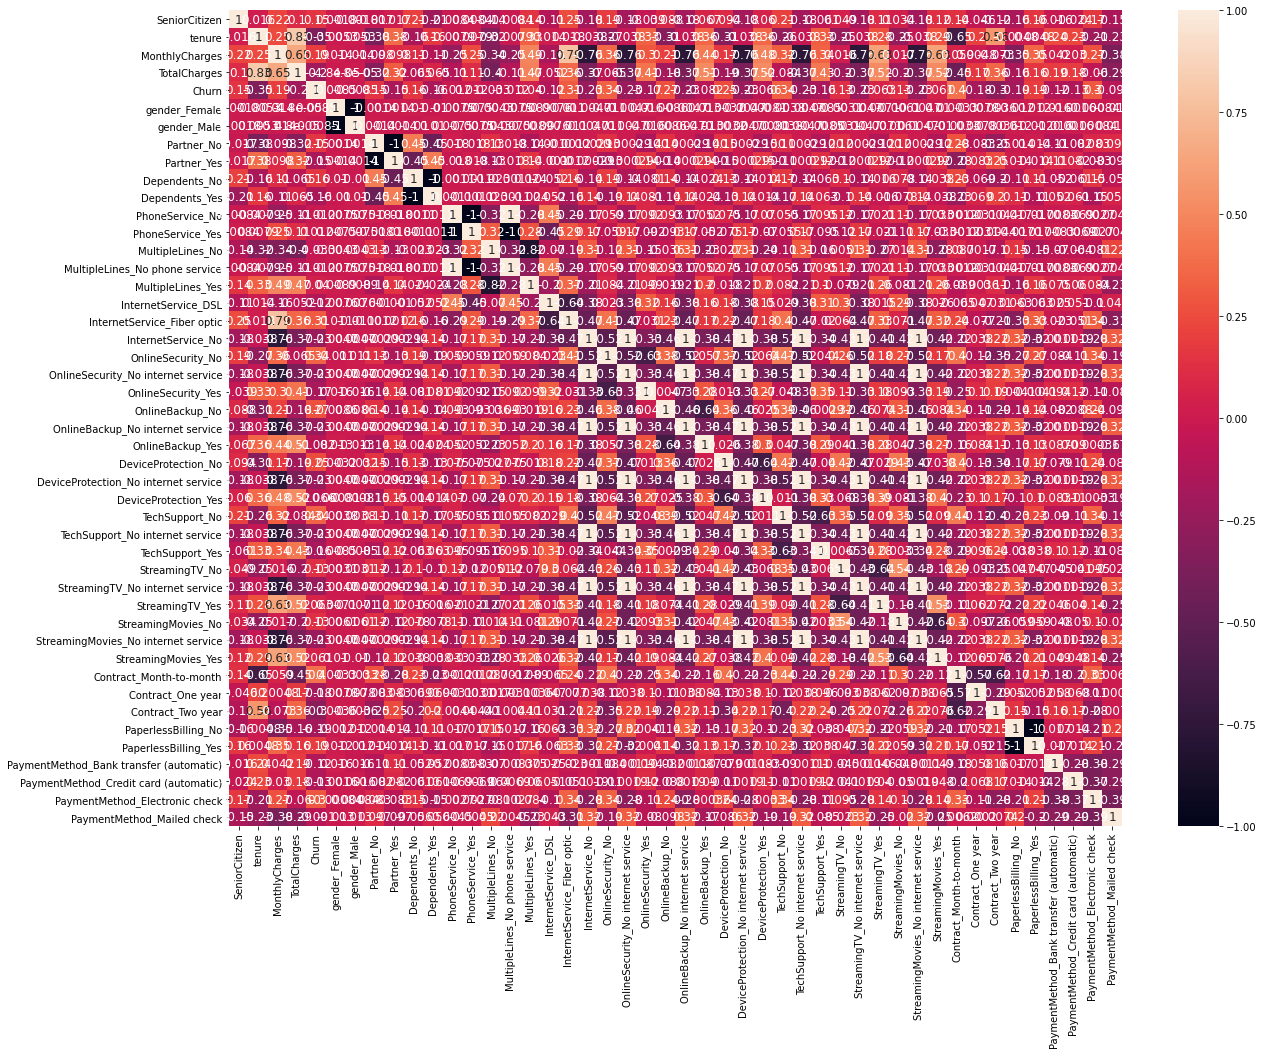

In [56]:

corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
               yticklabels=corr.columns.values, annot = True, 
               annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.

<AxesSubplot:>

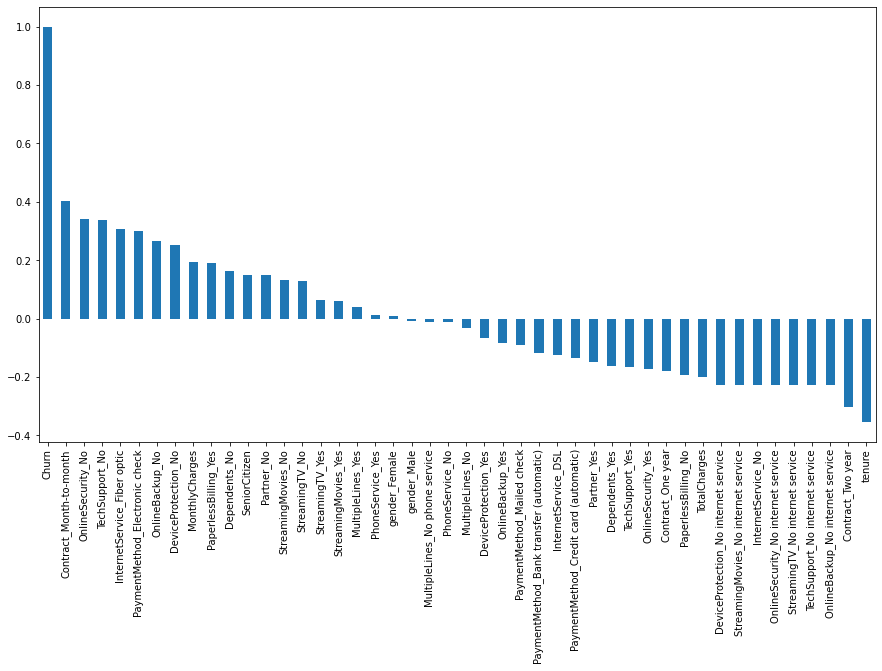

In [50]:
# Checking again Correlation of "Churn" with other variables on a different plot

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns more for the above correlations below before modelling and identifying the important variables.

# Feature Engineering

# Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding with      
the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn .

In [10]:
df2 = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents',
                          'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df2[column] = df2[column].map({'Female': 1, 'Male': 0})
    else: 
        df2[column] = df2[column].map({'Yes': 1, 'No': 0}) 

# One-Hot Encoding
One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in 
the data.In this project, we apply one-hot encoding to the following categorical variables: 


(1) Contract, (2) PaymentMethod, (3) MultipleLines, (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV, and (10)StreamingMovies.



In [11]:
#One-Hot Encoding
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity'
                            , 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  
                            'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df2 = pd.get_dummies(df2, columns = one_hot_encoding_columns)

Normalization
Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times.

There are multiple normalization techniques in statistics. In this project,we will use the min-max method to rescale the numeric columns(tenure,MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [12]:
#Normalization
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df2[column].min()
        # maximum value of the column
        max_column = df2[column].max()
        # min max scaler
        df2[column] = (df2[column] - min_column) / (max_column - min_column)   


In [13]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
#drop column customerID and tenure
df2.drop(columns= ['customerID'], axis=1, inplace=True)
df2.head()

# Preprocessing Data

In [127]:
print (df['Partner'].value_counts(ascending=True))

Yes    3393
No     3639
Name: Partner, dtype: int64


In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
****************************************************
gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No phone service' 'No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes' 'No internet service']
****************************************************
OnlineBackup : ['Yes' 'No' 'No internet service']
****************************************************
DeviceProtection : ['No' 'Yes' 'No internet service']
****************************************************
TechSupport : ['No'

# Machine Learning Model Evaluations and Predictions

Split the data set as train and test with %20-%80 ratio.

X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split

In [15]:
# select independent variables
X = df2.drop(columns='Churn')

# select dependent variables
y = df2.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

Then, we can use the train_test_split function from the sklearn.model_selection package to create both the training and testing sets.

In [16]:
# split the data in training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                              random_state=40, shuffle=True)

print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))


length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


In [17]:
X_train.shape
X_test.shape

(1407, 40)

In [18]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5414,0,0,0,0,0.887324,1,1,0.869652,0.794403,0,...,0,0,1,0,1,0,0,1,0,0
1251,1,0,0,0,0.000000,1,0,0.572637,0.006577,1,...,1,0,0,1,0,0,0,0,1,0
5423,0,0,0,0,0.169014,1,1,0.622886,0.114228,1,...,0,0,1,1,0,0,0,0,1,0
6676,1,0,1,1,0.563380,1,1,0.756716,0.447127,0,...,1,0,0,1,0,0,1,0,0,0
4080,1,0,1,1,0.394366,1,0,0.078109,0.077746,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,1,0,0,0,0.098592,1,1,0.549751,0.070782,0,...,1,0,0,1,0,0,0,0,1,0
307,0,0,1,1,0.394366,1,0,0.570149,0.234895,1,...,0,0,1,0,0,1,0,0,0,1
4224,1,0,1,0,0.985915,1,0,0.013433,0.161285,1,...,0,1,0,0,0,1,0,0,0,1
5601,1,0,1,1,0.478873,0,0,0.225373,0.157489,0,...,1,0,0,0,1,0,0,0,0,1


#  Logistics Regression

1). Importing Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

2). creating object for  Logistics Regression model

In [20]:
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

3). Logistics Regression Model Training using training dataset

In [21]:
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

4). Making Predictions using testing data set

In [22]:
pred_lg = model_lg.predict(X_test)

5). Calculating Accuracy of theLogistics Regression  model

In [23]:
lg = round(accuracy_score(y_test, pred_lg)*100,2)
print("Logistic Regression accuracy is :" ,lg)

Logistic Regression accuracy is : 79.82


6). Classification Report of the Logistics Regression  model

In [24]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1050
           1       0.61      0.56      0.59       357

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



7). confusion Matrix of the Logistics Regression 

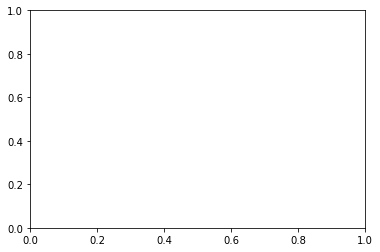

<function matplotlib.pyplot.show(close=None, block=None)>

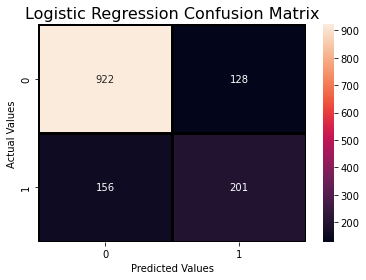

In [57]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1, annot = True,fmt = "d" ,linecolor="k",linewidths=3)
plt.title("Logistic Regression Confusion Matrix",fontsize=16)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show



7). confusion Matrix of the Logistics Regression

[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

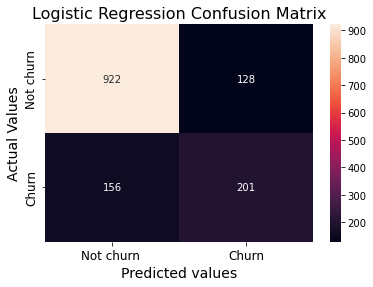

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt     
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.set_title('Logistic Regression Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(['Not churn ', 'Churn'],fontsize=12)
ax.yaxis.set_ticklabels(['Not churn', 'Churn'],fontsize=12)

# Using decision Tree Classifer

1). importing decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

2). Creating object of the decision Tree model

In [68]:
model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)

3). Decision Tree Model Training using training dataset

In [69]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

 4). Making Predictions using  testing data set

In [70]:
pred_dt = model_dt.predict(X_test)

5). Calculating Accuracy of the decision Tree model 

In [71]:
dt  = round(accuracy_score(y_test, pred_dt)*100, 2)
print("Decision Tree accuracy is",dt) 

Decision Tree accuracy is 78.75


6). Classification Report of the decision Tree model

In [72]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1050
           1       0.59      0.51      0.55       357

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



7). confusion Matrix of the decision Tree 

[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

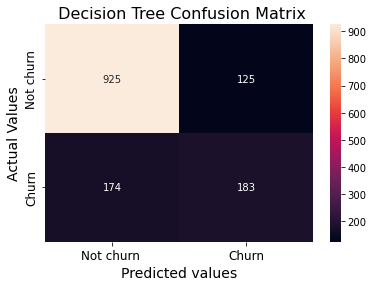

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt     
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.set_title(' Decision Tree Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(['Not churn ', 'Churn'],fontsize=12)
ax.yaxis.set_ticklabels(['Not churn', 'Churn'],fontsize=12)

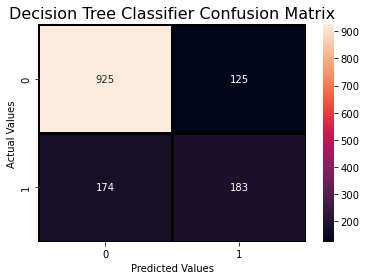

In [63]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt = "d" ,linecolor="k",linewidths=3)
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=16)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Using Random Forest

1). importing Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

2). Creating object of the Random Forest model

In [78]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16,
                                  random_state=42)

3). Random Forest Model Training using training dataset

In [79]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

4). Making Predictions using testing data set

In [80]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

5). Calculating Accuracy of the Random Forest model

In [81]:
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print('Random Forest model accuracy is ',rf)

Random Forest model accuracy is  74.63


6). Classification Report of the Random Forest model

In [82]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1050
           1       0.00      0.00      0.00       357

    accuracy                           0.75      1407
   macro avg       0.37      0.50      0.43      1407
weighted avg       0.56      0.75      0.64      1407



C:\Users\arunk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arunk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arunk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7). confusion Matrix of the Random Forest model

[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

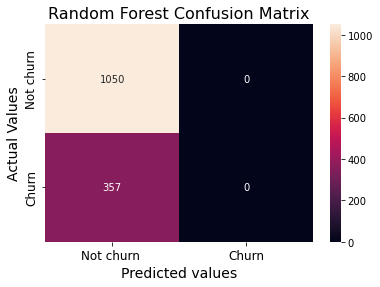

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt     
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
ax= plt.subplot()
sns.heatmap(cm3, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.set_title('Random Forest Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(['Not churn ', 'Churn'],fontsize=12)
ax.yaxis.set_ticklabels(['Not churn', 'Churn'],fontsize=12)

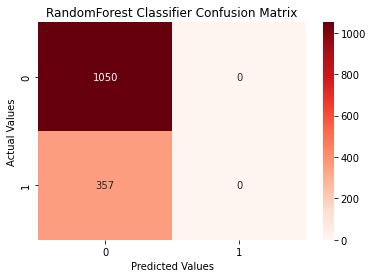

In [37]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt=  'd', linecolor="r",cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

 Machine learning model comparison to see which has the best Accuracy_score

,Model,Accuracy_score
0,Logistic Regression,79.82
1,Decision Tree,78.75
2,Random Forest,74.63


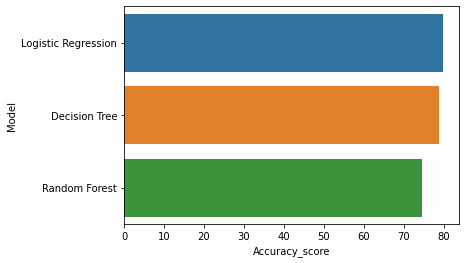

In [174]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy_score' :[lg, dt, rf]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)